# Magic Gamma Telescope

In [1]:
import sys
sys.path.append('/Users/IzmailovPavel/Documents/Education/Course Project/Code')
import numpy as np
import matplotlib as mpl

from matplotlib import pyplot as plt

from GP.covariance_functions import SquaredExponential
from GP.gaussian_process_classification import GPC

from sklearn.cluster import KMeans

from sklearn.datasets import load_svmlight_file
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
%matplotlib inline
%load_ext autoreload
%autoreload 2

## Данные

In [3]:
# x_tr, y_tr = load_svmlight_file('../../../../Programming/DataSets/Classification/magic_gamma_telescope(19020,11).txt')
data = np.load('../../../../Programming/DataSets/Classification/magic_gamma_telescope(19020,11).npy')
x_tr, y_tr = data[:, :-1], data[:, -1]
x_tr, y_tr = shuffle(x_tr, y_tr, random_state=241)
data_name = 'magic telescope'

# x_tr = x_tr.T
scaler = StandardScaler()
x_tr = scaler.fit_transform(x_tr).T
x_tr = (x_tr + 1) / 2
y_tr = y_tr[:, None]
y_tr[y_tr == 0] = -1
x_test = x_tr[:, int(x_tr.shape[1] * 0.8):]
y_test = y_tr[int(x_tr.shape[1] * 0.8):, :]
y_tr = y_tr[:int(x_tr.shape[1] * 0.8), :]
x_tr = x_tr[:, : int(x_tr.shape[1] * 0.8)]
dim, num = x_tr.shape

print('of objects:', num)
print('of features:', dim)
print(data_name)

of objects: 15215
of features: 10
magic telescope


## K-Means cluster centers

In [4]:
ind_num = 50
print('Finding means...')
means = KMeans(n_clusters=ind_num, n_init=3, max_iter=100, random_state=241)
means.fit(x_tr.T)
inputs = means.cluster_centers_.T
print('...found')

Finding means...
...found


In [5]:
cov_params = np.array([1., 1., 1.])

## svi-L-BFGS-B-c method

In [15]:
model_covariance_obj = SquaredExponential(np.copy(cov_params))
svi_gp = GPC(model_covariance_obj, method='svi')

In [16]:
opts = {'mode': 'full', 'maxiter': 100, 'mydisp': True}
svi_res = svi_gp.fit(x_tr, y_tr, inputs=inputs, optimizer_options=opts)

Hyper-parameters at iteration 0 : [ 1.  1.  1.  0.  0.]
Hyper-parameters at iteration 1 : [ 0.99892016  1.7618086   0.99892016  0.16217421  0.1385381 ]
Hyper-parameters at iteration 2 : [ 1.0986876   2.44237045  0.64321784  0.34083851  0.29427466]
Hyper-parameters at iteration 3 : [ 1.3140426   3.3455302   0.42478591  0.59877486  0.51480589]
Hyper-parameters at iteration 4 : [ 1.62698244  4.55797512  0.28463631  0.9496354   0.81380692]
Hyper-parameters at iteration 5 : [ 2.32427819  7.41513344  0.2524348   1.76134886  1.51038573]
Hyper-parameters at iteration 6 : [ 2.56671959  8.31409168  0.36402298  2.00132659  1.75152657]
Hyper-parameters at iteration 7 : [ 2.67706849  8.65990159  0.33420729  2.10159057  1.84499418]
Hyper-parameters at iteration 8 : [ 2.75379071  8.81998347  0.31009852  2.14655723  1.89854228]
Hyper-parameters at iteration 9 : [ 2.85004476  8.90740627  0.29070601  2.16729771  1.9506942 ]
Hyper-parameters at iteration 10 : [ 3.14915611  8.92662193  0.25475679  2.15269

In [17]:
metric = lambda w: svi_gp.get_prediction_quality(w, x_test, y_test)
svi_x_lst, svi_y_lst = svi_res.plot_performance(metric, 't', freq=1)

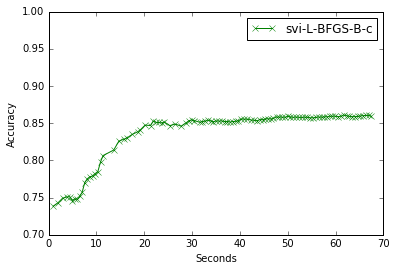

In [18]:
plt.plot(svi_x_lst[1:], svi_y_lst[1:], '-gx', label='svi-L-BFGS-B-c')
plt.ylim([0.7, 1.])
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('Accuracy')

## vi-means-c method

### Jaakkola-Jordan
Подбор числа пересчетов

In [10]:
maxfuns = [5, 10, 15, 20]
results = []
for maxfun in maxfuns:
    print(maxfun)
    model_covariance_obj = SquaredExponential(np.copy(cov_params))
    vi_gp = GPC(model_covariance_obj, method='vi')
    opts = {'maxfun':maxfun, 'mydisp': False, 'num_updates':3}
    results.append(vi_gp.fit(x_tr, y_tr, inputs=inputs, optimizer_options=opts, max_out_iter=10))
    print()

5

10

15

20



0
1
2
3


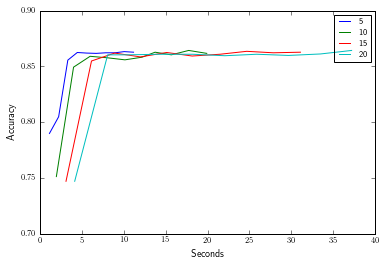

In [12]:
metric = lambda w: vi_gp.get_prediction_quality(w, x_test, y_test)
for i in range(len(maxfuns)):
    vi_x_lst, vi_y_lst = results[i].plot_performance(metric, 't', freq=1)
    plt.plot(vi_x_lst[1:], vi_y_lst[1:], label=maxfuns[i])
    print(i)
plt.ylim([.7, .9])
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('Accuracy')

Обучение лучшего варианта

In [15]:
model_covariance_obj = SquaredExponential(np.copy(cov_params))
vi_gp = GPC(model_covariance_obj, method='vi')
opts = {'maxfun':5, 'mydisp': True, 'num_updates':3}
vi_res = vi_gp.fit(x_tr, y_tr, inputs=inputs, optimizer_options=opts, max_out_iter=40)

Hyper-parameters at iteration 0 : [ 1.  1.  1.]
	Hyper-parameters at outter iteration 0 : [ 0.99724596  3.77907805  0.99724596]
Hyper-parameters at iteration 0 : [ 0.99724596  3.77907805  0.99724596]
Hyper-parameters at iteration 1 : [ 1.22027781  3.77780163  0.99691162]
Hyper-parameters at iteration 2 : [ 1.24746173  3.71852067  0.01      ]
Hyper-parameters at iteration 3 : [ 1.53077094  3.60451151  0.01      ]
Hyper-parameters at iteration 4 : [ 2.22280322  3.23916601  0.01      ]
	Hyper-parameters at outter iteration 1 : [ 2.67291269  2.99074334  0.01      ]
Hyper-parameters at iteration 0 : [ 2.67291269  2.99074334  0.01      ]
Hyper-parameters at iteration 1 : [ 6.336149    2.92933936  0.01      ]
	Hyper-parameters at outter iteration 2 : [ 5.27950498  2.95534746  0.01      ]
Hyper-parameters at iteration 0 : [ 5.27950498  2.95534746  0.01      ]
Hyper-parameters at iteration 1 : [ 5.2662837   3.34346399  0.01      ]
	Hyper-parameters at outter iteration 3 : [ 5.26782128  3.299714

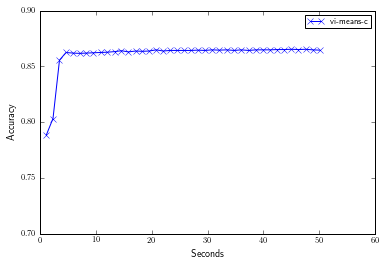

In [17]:
metric = lambda w: vi_gp.get_prediction_quality(w, x_test, y_test)
vi_x_lst, vi_y_lst = vi_res.plot_performance(metric, 't', freq=1)
plt.plot(vi_x_lst[1:], vi_y_lst[1:], '-bx', label='vi-means-c')
# plt.plot(svi_x_lst[1:100], svi_y_lst[1:100], '-gx', label='svi-L-BFGS-B-c')
plt.ylim([0.7, .9])
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('Accuracy')

### Taylor
Подбор числа пересчетов

In [12]:
maxfuns = [5, 10, 15, 20]
results = []
for maxfun in maxfuns:
    print(maxfun)
    model_covariance_obj = SquaredExponential(np.copy(cov_params))
    vi_gp = GPC(model_covariance_obj, method='vi')
    opts = {'bound': 'Taylor', 'maxfun':maxfun, 'mydisp': False, 'num_updates':3}
    results.append(vi_gp.fit(x_tr, y_tr, inputs=inputs, optimizer_options=opts, max_out_iter=10))
    print()

5

10

15

20



0
1
2
3


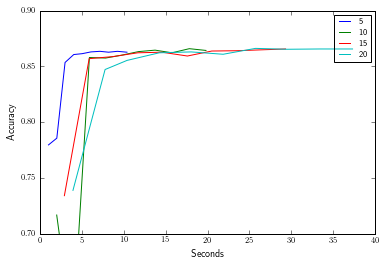

In [13]:
metric = lambda w: vi_gp.get_prediction_quality(w, x_test, y_test)
for i in range(len(maxfuns)):
    temp_vi_x_lst, temp_vi_y_lst = results[i].plot_performance(metric, 't', freq=1)
    plt.plot(temp_vi_x_lst[1:], temp_vi_y_lst[1:], label=maxfuns[i])
    print(i)
plt.ylim([.7, .9])
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('Accuracy')

Обучение лучшего варианта

In [18]:
model_covariance_obj = SquaredExponential(np.copy(cov_params))
vi_gp = GPC(model_covariance_obj, method='vi')
opts = {'bound': 'Taylor', 'maxfun':5, 'mydisp': True, 'num_updates':3}
vi_res = vi_gp.fit(x_tr, y_tr, inputs=inputs, optimizer_options=opts, max_out_iter=40)

Hyper-parameters at iteration 0 : [ 1.  1.  1.]
	Hyper-parameters at outter iteration 0 : [ 0.99647681  4.55522199  0.99647681]
Hyper-parameters at iteration 0 : [ 0.99647681  4.55522199  0.99647681]
Hyper-parameters at iteration 1 : [ 1.10012415  4.5543768   0.99629337]
Hyper-parameters at iteration 2 : [ 1.05087138  4.54482895  0.01      ]
Hyper-parameters at iteration 3 : [ 1.22888424  4.51993077  0.01      ]
Hyper-parameters at iteration 4 : [ 1.738717    4.31111002  0.01      ]
	Hyper-parameters at outter iteration 1 : [ 2.23966725  3.96842115  0.01      ]
Hyper-parameters at iteration 0 : [ 2.23966725  3.96842115  0.01      ]
Hyper-parameters at iteration 1 : [ 6.99198337  3.85889679  0.01      ]
	Hyper-parameters at outter iteration 2 : [ 5.84896927  3.89144735  0.01      ]
Hyper-parameters at iteration 0 : [ 5.84896927  3.89144735  0.01      ]
Hyper-parameters at iteration 1 : [ 5.90740331  3.86318741  0.01      ]
	Hyper-parameters at outter iteration 3 : [ 5.90740535  3.863187

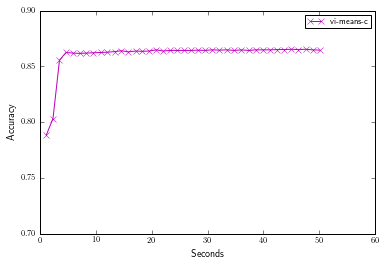

In [20]:
metric = lambda w: vi_gp.get_prediction_quality(w, x_test, y_test)
vi_t_x_lst, vi_t_y_lst = vi_res.plot_performance(metric, 't', freq=1)
plt.plot(vi_t_x_lst[1:], vi_t_y_lst[1:], '-mx', label='vi-means-c')
plt.ylim([0.7, .9])
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('Accuracy')

### Stochastic Taylor

In [30]:
model_covariance_obj = SquaredExponential(np.copy(cov_params))
vi_gp = GPC(model_covariance_obj, method='vi')
opts = {'bound': 'Taylor', 'mode': 'adadelta', 'num_updates': 2, 'mydisp': True, 'print_freq': 1, 'step_rate': .7,
        'maxiter': 2, 'batch_size':500}
vi_res = vi_gp.fit(x_tr, y_tr, inputs=inputs, optimizer_options=opts, max_out_iter=40)

Iteration  0 :
	Gradient norm 90.9599831366
Iteration  1 :
	Gradient norm 31.0668066522
	Hyper-parameters at outter iteration 0 : [ 1.22722999  1.50371066  0.41376377]
Iteration  0 :
	Gradient norm 8.69301372613
Iteration  1 :
	Gradient norm 62.8715798467
	Hyper-parameters at outter iteration 1 : [ 1.51653061  1.82718318  0.23807999]
Iteration  0 :
	Gradient norm 84.9963637789
Iteration  1 :
	Gradient norm 19.0716040773
	Hyper-parameters at outter iteration 2 : [ 1.8618333   2.06716541  0.20054636]
Iteration  0 :
	Gradient norm 40.9723809066
Iteration  1 :
	Gradient norm 98.2157433664
	Hyper-parameters at outter iteration 3 : [ 2.24320488  2.22800266  0.1559168 ]
Iteration  0 :
	Gradient norm 16.2357525798
Iteration  1 :
	Gradient norm 18.8120883752
	Hyper-parameters at outter iteration 4 : [ 2.52554953  2.32421909  0.13097822]
Iteration  0 :
	Gradient norm 64.5669785469
Iteration  1 :
	Gradient norm 23.5853066243
	Hyper-parameters at outter iteration 5 : [ 2.79790603  2.40455894  0.12

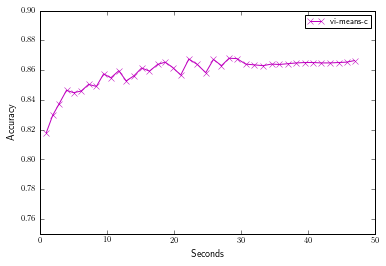

In [31]:
metric = lambda w: vi_gp.get_prediction_quality(w, x_test, y_test)
vi_st_x_lst, vi_st_y_lst = vi_res.plot_performance(metric, 't', freq=1)
plt.plot(vi_st_x_lst[1:], vi_st_y_lst[1:], '-mx', label='vi-means-c')
# plt.plot(svi_x_lst[1:100], svi_y_lst[1:100], '-gx', label='svi-L-BFGS-B-c')
plt.ylim([.75, .9])
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('Accuracy')

### JJ-full

In [9]:
model_covariance_obj = SquaredExponential(np.copy(cov_params))
vi_gp = GPC(model_covariance_obj, method='vi_full')
opts = {'maxiter':50, 'mydisp': True}
vi_res = vi_gp.fit(x_tr, y_tr, inputs=inputs, optimizer_options=opts)

Hyper-parameters at iteration 0 : [ 1.  1.  1.  1.  1.]
Hyper-parameters at iteration 1 : [ 0.99900903  1.99997856  0.99900903  1.00003037  1.00004931]
Hyper-parameters at iteration 2 : [ 0.96191483  1.86458208  0.01        1.00004057  1.0000708 ]
Hyper-parameters at iteration 3 : [ 1.12237568  1.99413267  0.01        1.00006853  1.00011119]
Hyper-parameters at iteration 4 : [ 1.39489943  2.21572369  0.01        1.00019308  1.00028421]
Hyper-parameters at iteration 5 : [ 1.62033215  2.39071129  0.01        1.00045389  1.00064869]
Hyper-parameters at iteration 6 : [ 1.84935693  2.56042584  0.01        1.00088913  1.00126459]
Hyper-parameters at iteration 7 : [ 2.04935669  2.70210847  0.01        1.00140306  1.00199888]
Hyper-parameters at iteration 8 : [ 2.21989881  2.81747821  0.01        1.00194428  1.00277772]
Hyper-parameters at iteration 9 : [ 2.35767306  2.90597891  0.01        1.00245686  1.00351901]
Hyper-parameters at iteration 10 : [ 2.47131536  2.97457935  0.01        1.00294

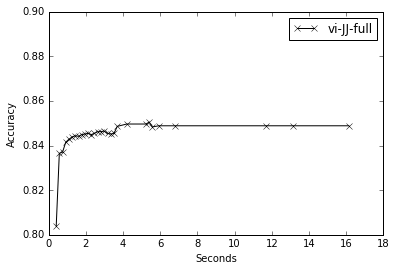

In [10]:
metric = lambda w: vi_gp.get_prediction_quality(w, x_tr, y_tr, x_test, y_test)
vi_full_x_lst, vi_full_y_lst = vi_res.plot_performance(metric, 't', freq=1)
plt.plot(vi_full_x_lst[1:], vi_full_y_lst[1:], '-kx', label='vi-JJ-full')
# plt.plot(svi_x_lst[1:100], svi_y_lst[1:100], '-gx', label='svi-L-BFGS-B-c')
plt.ylim([0.8, .9])
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('Accuracy')

## svi-AdaDelta-c
Подберем шаг для метода

In [9]:
results = []
steps = [1., .9, .8, .7, .6, .5, .4, .3]
for step in steps:
    print(step)
    model_covariance_obj = SquaredExponential(np.copy(cov_params))
    ad_gp = GPC(model_covariance_obj, method='svi', hermgauss_deg=100)

    opts = {'mode': 'adadelta', 'maxiter': 10, 'verbose': False, 'batch_size': 150, 
            'step_rate': step}#, 'print_freq':50}
    batch_res = ad_gp.fit(x_tr, y_tr, inputs=inputs, optimizer_options=opts)
    results.append(batch_res)

1.0
0.9
0.8
0.7
0.6
0.5
0.4
0.3


/Users/IzmailovPavel/Documents/Education/Course Project/Code/GP/gaussian_process_classification.py:614: RuntimeWarning: invalid value encountered in log
  loss += np.sum(np.log(np.diag(sigma_L))) * l / N


0
1
2
3
4
5
6
7


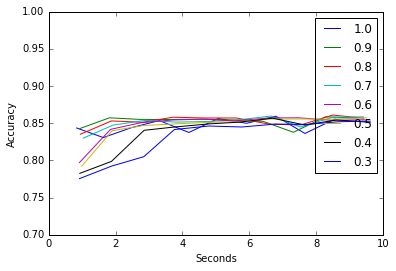

In [10]:
metric = lambda w: ad_gp.get_prediction_quality(w, x_test, y_test)
for i in range(len(results)):
    svi_ad_x_lst, svi_ad_y_lst = results[i].plot_performance(metric, 't', freq=1)
    plt.plot(svi_ad_x_lst[1:], svi_ad_y_lst[1:], label=steps[i])
    print(i)
plt.ylim([0.7, 1.])
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('Accuracy')

In [19]:
model_covariance_obj = SquaredExponential(np.copy(cov_params))
ad_gp = GPC(model_covariance_obj, method='svi', hermgauss_deg=100)
opts = {'mode': 'adadelta', 'maxiter': 50, 'verbose': True, 'batch_size': 150, 
        'step_rate': .8, 'print_freq':10}
batch_res = ad_gp.fit(x_tr, y_tr, inputs=inputs, optimizer_options=opts)

Using AdaDelta optimizer
Iteration  9 :
	Gradient norm 27.8335715786
Iteration  19 :
	Gradient norm 33.1771578331
Iteration  29 :
	Gradient norm 15.3333343164
Iteration  39 :
	Gradient norm 18.8630149146
Iteration  49 :
	Gradient norm 15.2269960793


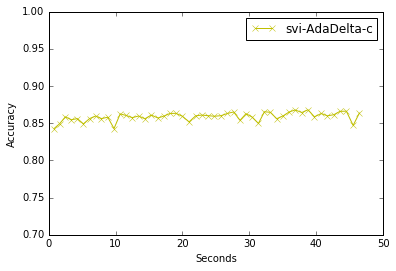

In [20]:
metric = lambda w: ad_gp.get_prediction_quality(w, x_test, y_test)
svi_ad_x_lst, svi_ad_y_lst = batch_res.plot_performance(metric, 't', freq=1)
plt.plot(svi_ad_x_lst[1:], svi_ad_y_lst[1:], '-yx', label='svi-AdaDelta-c')
plt.ylim([0.7, 1.])
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('Accuracy')

## Выводы

In [12]:
svi_x_lst = np.load('../plots/vi_vs_svi_class/'+ data_name +'_svi_x.npy')
svi_y_lst = np.load('../plots/vi_vs_svi_class/'+ data_name +'_svi_y.npy')
vi_x_lst = np.load('../plots/vi_vs_svi_class/'+ data_name +'_vi_x.npy')
vi_y_lst = np.load('../plots/vi_vs_svi_class/'+ data_name +'_vi_y.npy')
vi_t_x_lst = np.load('../plots/vi_vs_svi_class/'+ data_name +'_vi_t_x.npy')
vi_t_y_lst = np.load('../plots/vi_vs_svi_class/'+ data_name +'_vi_t_y.npy')
svi_ad_x_lst = np.load('../plots/vi_vs_svi_class/'+ data_name +'_ad_x.npy')
svi_ad_y_lst = np.load('../plots/vi_vs_svi_class/'+ data_name +'_ad_y.npy')
vi_full_x_lst = np.load('../plots/vi_vs_svi_class/'+ data_name +'_vi_f_x.npy')
vi_full_y_lst = np.load('../plots/vi_vs_svi_class/'+ data_name +'_vi_f_y.npy')

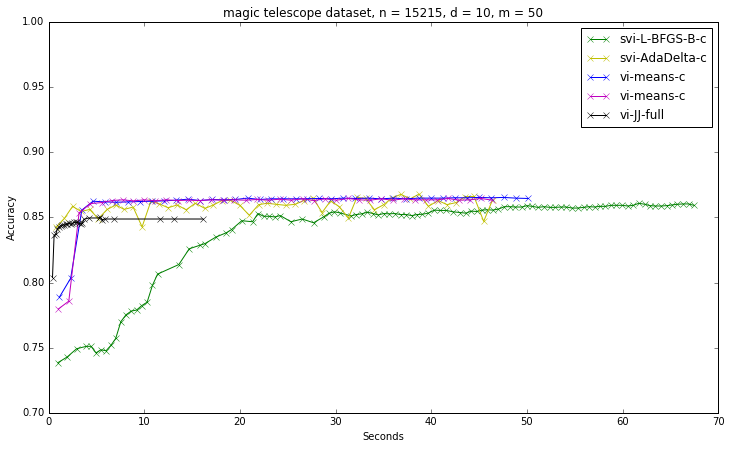

In [14]:
plt.figure(figsize=(12, 7))
plt.plot(svi_x_lst[1:], svi_y_lst[1:], '-gx', label='svi-L-BFGS-B-c')
plt.plot(svi_ad_x_lst[1:], svi_ad_y_lst[1:], '-yx', label='svi-AdaDelta-c')
plt.plot(vi_x_lst[1:], vi_y_lst[1:], '-bx', label='vi-means-c')
plt.plot(vi_t_x_lst[1:], vi_t_y_lst[1:], '-mx', label='vi-means-c')
plt.plot(vi_full_x_lst[1:], vi_full_y_lst[1:], '-kx', label='vi-JJ-full')
plt.ylim([0.7, 1.])
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('Accuracy')
plt.title(data_name+' dataset, n = ' + str(num) + ', d = ' + str(dim) + ', m = '+ str(ind_num))

In [22]:
np.save('../plots/vi_vs_svi_class/'+ data_name +'_svi_x.npy', svi_x_lst)
np.save('../plots/vi_vs_svi_class/'+ data_name +'_svi_y.npy', svi_y_lst)
np.save('../plots/vi_vs_svi_class/'+ data_name +'_vi_x.npy', vi_x_lst)
np.save('../plots/vi_vs_svi_class/'+ data_name +'_vi_y.npy', vi_y_lst)
np.save('../plots/vi_vs_svi_class/'+ data_name +'_vi_t_x.npy', vi_t_x_lst)
np.save('../plots/vi_vs_svi_class/'+ data_name +'_vi_t_y.npy', vi_t_y_lst)
np.save('../plots/vi_vs_svi_class/'+ data_name +'_ad_x.npy', svi_ad_x_lst)
np.save('../plots/vi_vs_svi_class/'+ data_name +'_ad_y.npy', svi_ad_y_lst)

In [32]:
np.save('../plots/vi_vs_svi_class/'+ data_name +'_vi_st_x.npy', vi_st_x_lst)
np.save('../plots/vi_vs_svi_class/'+ data_name +'_vi_st_y.npy', vi_st_y_lst)

In [11]:
np.save('../plots/vi_vs_svi_class/'+ data_name +'_vi_f_x.npy', vi_full_x_lst)
np.save('../plots/vi_vs_svi_class/'+ data_name +'_vi_f_y.npy', vi_full_y_lst)